Classification for heart disease using MLP Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('heart_disease_for_curves.csv') 
df.head()

,sample,cholesteral,thalac,oldpeak,disease
0,train,261,141,3,positive
1,train,263,105,2,negative
2,train,269,121,2,negative
3,train,177,140,4,negative
4,train,256,142,6,positive


In [3]:
Y = df['disease']
X = df.drop(['sample','disease'], axis=1)

In [4]:
# Training and test samples
X_train = X[0:151]
y_train = Y[0:151]
X_test = X[152:270]
y_test = Y[152:270]


In [12]:
mlp = MLPClassifier(solver='lbfgs',alpha=1,
                    hidden_layer_sizes=(20, 20), 
                    random_state=1)

mlp.fit(X_train, y_train)

print("Accuracy (training set): {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy (test set): {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy (training set): 0.722
Accuracy (test set): 0.746


Using MPL Classifier it was possible to classify if the sample is positive or negative for heart disease with an accuracy of around 75%

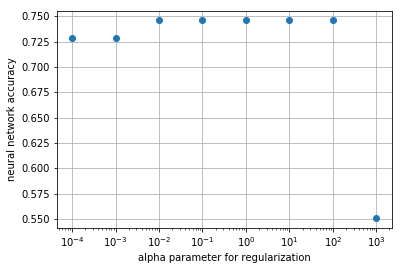

In [6]:
classifiers = []

# create range of alpha values to test
for a in [10e-5,10e-4,10e-3,10e-2,10e-1,10,10e1,10e2]:
    mpl = MLPClassifier(solver='lbfgs', alpha=a,
                    hidden_layer_sizes=(20, 20), 
                    random_state=1)
    classifiers.append(mpl)

scores = {}
for clf in classifiers:
    # fit the network
    clf.fit(X_train, y_train)
    scores[clf.alpha] = (clf.score(X_test, y_test))

# plot
line = plt.figure()
plt.plot(list(scores.keys()), list(scores.values()), "o")
plt.semilogx()
plt.xlabel("alpha parameter for regularization")
plt.ylabel("neural network accuracy")
plt.grid(True)
plt.show()

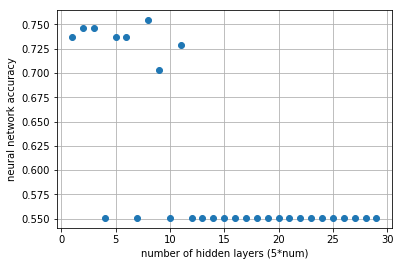

In [7]:
scores = []

# layers
numbers = range(1,30)

# loop through the different numbers of layers
for num in numbers:
    mlp = MLPClassifier(solver='lbfgs', random_state=1, alpha=1, max_iter = 100, hidden_layer_sizes=tuple([5] * num))
    mlp.fit(X_train,y_train)
    scores.append(mlp.score(X_test,y_test))

# plot
line = plt.figure()
plt.plot(numbers, scores, "o")
plt.xlabel("number of hidden layers (5*num)")
plt.ylabel("neural network accuracy")
plt.grid(True)
plt.show()

C:\Users\taisa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


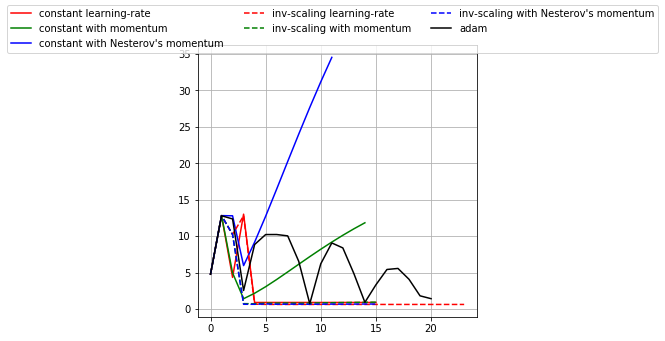

In [8]:
#Source: https://anaconda.org/anaconda-enterprise/neural-networks/notebook

from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

# labels for each collection of parameters
labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

# plotting arguments
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

# plot the results
fig, axes = plt.subplots(1,1, figsize=(5, 5))
mlps = []
X = MinMaxScaler().fit_transform(X_train)

# loop through each set of parameters
for label, param, args in zip(labels, params, plot_args):
    mlp = MLPClassifier(verbose=0, random_state=0, max_iter = 1000, **param)
    mlp.fit(X_train, y_train)
    mlps.append(mlp)
    axes.plot(mlp.loss_curve_, **args)

# show the plot
fig.legend(labels=labels, ncol=3, loc="upper center")
plt.grid(True)
plt.show()